In [546]:
#memasukkan library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [547]:
#membaca dataset bengkel(input crisp value servis dan harga)
data = pd.read_excel('/content/sample_data/bengkel.xlsx')

#menampilkan isi data bengkel
data

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
5,6,59,10
6,7,61,8
7,8,30,10
8,9,45,1
9,10,36,9


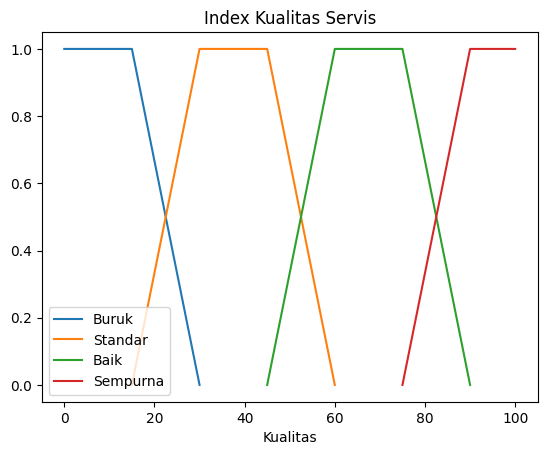

In [548]:
#Membuat design keanggotaan
#Fuzzy buruk berada di titik 15 sampai 30 (inti 1-15)
range1 = [[30,0],[15,1],[0,1]]
#Fuzzy standar berada di titik 15 sampai 60 (inti 30-45)
range2 = [[60,0],[45,1],[30,1],[15,0]]
#Fuzzy baik berada di titik 45 sampai 90 (inti 60-75)
range3 = [[90,0],[75,1],[60,1],[45,0]]
#Fuzzy sempurna berada di titik 75 sampai 100 (inti 90-100)
range4 = [[100,1],[90,1],[75,0]]

#memasukkan range tersebut ke array bangun datar
bangun_datar = [range1, range2, range3, range4]

#divisualisasikan sesuai dengan fungsi keanggotaannya(trapesium)
fig,ax = plt.subplots()

#loop titik crisp value untuk menentukan bentuk diagram garisnya
for a in bangun_datar :
  xs, xy = zip(*a)
  ax.plot(xs, xy)
  ax.set_title("Index Kualitas Servis")

#memberikan nama untuk diagram garis
plt.xlabel("Kualitas")
plt.legend(["Buruk", "Standar", "Baik", "Sempurna"])


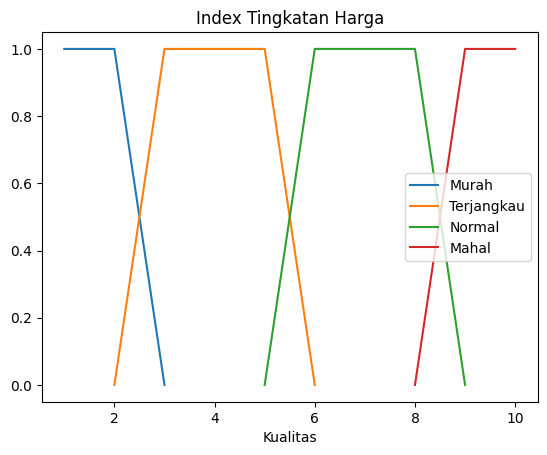

In [549]:
#Membuat design keanggotaan

#Fuzzy murah berada di titik 2 sampai 3 (inti 1-2)
range1 = [[3,0],[2,1],[1,1]]
#Fuzzy terjangkau berada di titik 2 sampai 6 (inti 3-5)
range2 = [[6,0],[5,1],[3,1],[2,0]]
#Fuzzy normal berada di titik 5 sampai 9 (inti 6-8)
range3 = [[9,0],[8,1],[6,1],[5,0]]
#Fuzzy mahal berada di titik 8 sampai 10 (inti 9)
range4 = [[10,1],[9,1],[8,0]]

#memasukkan range tersebut ke array bangun datar
bangun_datar = [range1, range2, range3, range4]

#divisualisasikan sesuai dengan fungsi keanggotaannya(trapesium)
fig,ax = plt.subplots()

#loop titik crisp value untuk menentukan bentuk diagram garisnya
for a in bangun_datar :
  xs, xy = zip(*a)
  ax.plot(xs, xy)
  ax.set_title("Index Tingkatan Harga")

#memberikan nama untuk diagram garis
plt.xlabel("Kualitas")
plt.legend(["Murah", "Terjangkau", "Normal", "Mahal"])


In [550]:
#Metode Fuzzifikasi menggunakan rumus trapesium

#Fuzzifikasi servis

#fungsi fuzzy servis sempurna
def servis_sempurna(x): #nilai a = 75, b = 90
  if x <= 75:
      return 0 #di bawah nilai a tidak dianggap fuzzy sempurna(0)
  elif x > 75 and x < 90:
      return ((x-75)/(90-75)) #nilai di tengah a dan b
  elif x >= 90:
      return 1 #di atas nilai b dianggap fuzzy sempurna(1)

#fungsi fuzzy servis baik
def servis_baik(x): #nilai a = 45, b = 60, c = 75, d = 90
  if x <= 45:
      return 0 #di bawah nilai a tidak dianggap fuzzy baik(0)
  elif x > 45 and x < 60:
      return ((x-45)/(60-45)) #nilai di tengah a dan b(return nilai (x-b)/(b-a))
  elif x >= 60 and x <= 75:
      return 1 # nilai di tengah b dan c dianggap normal(1)
  elif x > 75 and x < 90:
      return -((x-90)/(90-75)) #nilai di tengah c dan d(return nilai -(x-d)/(d-c))
  elif x >= 90:
      return 0 #di batas nilai d tidak dianggap normal (0)

#fungsi fuzzy standar
def servis_standar(x):  #nilai a = 15, b = 30, c = 45, d = 60
  if x <= 15:
      return 0
  elif x > 15 and x < 30:
      return ((x-15)/(30-15))
  elif x >= 30 and x <= 45:
      return 1
  elif x > 45 and x < 60:
      return -((x-60)/(60-45))
  elif x >= 60:
      return 0

#fungsi fuzzy buruk
def servis_buruk(x): #nilai a = 15, b = 30
  if x >= 30:
      return 0
  elif x > 15 and x < 30:
      return ((x-30)/(30-15))
  elif x <= 15:
      return 1

#Fuzzifikasi Harga

#fungsi fuzzy mahal
def harga_mahal(x): #nilai a = 8, b = 9
  if x <= 8:
      return 0 #di bawah nilai 8 tidak dianggap fuzzy mahal(0)
  elif x > 8 and x < 9:
      return ((x-9)/(9-8))  #nilai di tengah a dan b(return nilai (x-b)/(b-a))
  elif x >= 9:
      return 1 #di atas nilai 9 dianggap fuzzy mahal (1)

#fungsi fuzzy normal
def harga_normal(x): #nilai a = 5, b = 6, c = 8, d = 9
  if x <= 5 :
      return 0 #di bawah nilai 5 tidak dianggap normal (0)
  elif x > 5 and x < 6:
      return ((x-5)/(6-5)) #nilai di tengah a dan b(return nilai (x-b)/(b-a))
  elif x >= 6 and x <= 8:
      return 1 # nilai di tengah b dan c dianggap normal(1)
  elif x > 8 and x < 9:
      return -((x-9)/(9-8)) #nilai di tengah c dan d(return nilai -(x-d)/(d-c))
  elif x >= 9:
      return 0 #di batas nilai d tidak dianggap normal (0)

#fungsi fuzzy terjangkau
def harga_terjangkau(x): #nilai a = 2, b = 3, c = 5, d = 6
  if x <= 2 :
      return 0
  elif x > 2 and x < 3:
      return ((x-2)/(3-2))
  elif x >= 3 and x <= 5:
      return 1
  elif x > 5 and x < 6:
      return -((x-6)/(6-5))
  elif x >= 6:
      return 0

#fungsi fuzzy murah
def harga_murah(x): #nilai a = 2, b = 3
    if x <= 2:
      return 1
    elif x > 2 and x < 3:
      return ((x-2)/(3-2))
    elif x >= 3:
      return 0

In [551]:
#emasukkan hasil return fuzzifikasi di atas ke dalam variabel yang akan digunakan dalam inferensi

#fungsi memasukkan nilai fuzzy untuk servis
#parameter kualitas adalah input crisp value milik servis yang menjadi nilai x pada metode fuzzifikasi di atas
def fuzzyServis(kualitas):
    #mendeklarasikan variabel level servis untuk akan diisi nantinya
    level_servis = {}
    level_servis['sempurna'] = servis_sempurna(kualitas)
    level_servis['baik'] = servis_baik(kualitas)
    level_servis['standar'] = servis_standar(kualitas)
    level_servis['buruk'] = servis_buruk(kualitas)

    #mengembalikan nilai variabel level_servis yang sudah di input hasil fuzzifikasi servis
    return level_servis

#fungsi memasukkan nilai fuzzy untuk harga
#parameter harga adalah input crisp value milik harga  yang menjadi nilai x pada metode fuzzifikasi di atas
def fuzzyHarga(harga):
    #mendeklarasikan variabel tingkat untuk akan diisi nantinya
    range_harga = {}
    range_harga['murah'] = harga_murah(harga)
    range_harga['terjangkau'] = harga_terjangkau(harga)
    range_harga['normal'] = harga_normal(harga)
    range_harga['mahal'] = harga_mahal(harga)

    #mengembalikan nilai variabel tingkat harga yang sudah di input hasil fuzzifikasi harga
    return range_harga

In [552]:
#Inferensi (design aturan fuzzy)

#dengan fuzzy rule, kode dapat menentukan akan masuk kemana inputan crisp value pada tingkatan linguistik fuzzynya
def inferensi(level_servis, range_harga): #parameter mengambil hasil nilai yang sudah melalui metode fuzzy
    #pada tingkatan inferensi dibuat 4 linguistik yang menentukan kelayakan bengkel (excellent, good, average dan bad)

    #define 4 linguistik menjadi variabel array kosong yang nantinya di inputkan fuzzy yang telah melalui inferensi
    tingkatInferensi = {'Excellent': [], 'Good': [], 'Average': [], 'Bad': []}

    #setiap crisp value akan melalui metode pembagian via aturan fuzzy(inferensi)

    #menghasilkan 16 rules (4 x 4) combinatorial, menggunakan clipping technique (menghindari nilai yang terlalu tinggi atau rendah)
    tingkatInferensi['Average'].append(min(level_servis['buruk'],range_harga['murah'])) #setiap rules memiliki 2 input dan 4 linguistik
    tingkatInferensi['Bad'].append(min(level_servis['buruk'],range_harga['terjangkau']))
    tingkatInferensi['Bad'].append(min(level_servis['buruk'],range_harga['normal']))
    tingkatInferensi['Bad'].append(min(level_servis['buruk'],range_harga['mahal']))

    tingkatInferensi['Average'].append(min(level_servis['standar'], range_harga['murah']))
    tingkatInferensi['Average'].append(min(level_servis['standar'], range_harga['terjangkau']))
    tingkatInferensi['Average'].append(min(level_servis['standar'], range_harga['normal']))
    tingkatInferensi['Bad'].append(min(level_servis['standar'],range_harga['mahal']))

    tingkatInferensi['Excellent'].append(min(level_servis['baik'], range_harga['murah']))
    tingkatInferensi['Good'].append(min(level_servis['baik'], range_harga['terjangkau']))
    tingkatInferensi['Good'].append(min(level_servis['baik'], range_harga['normal']))
    tingkatInferensi['Good'].append(min(level_servis['baik'],range_harga['mahal']))

    tingkatInferensi['Excellent'].append(min(level_servis['sempurna'], range_harga['murah']))
    tingkatInferensi['Excellent'].append(min(level_servis['sempurna'], range_harga['terjangkau']))
    tingkatInferensi['Excellent'].append(min(level_servis['sempurna'], range_harga['normal']))
    tingkatInferensi['Good'].append(min(level_servis['sempurna'],range_harga['mahal']))

    #fuzzy OR (disjuntion rule), menggabungkan 2/lebih himpunan fuzzy menjadi satu yang mencangkup nilai yang maksimum
    tingkatInferensi['Excellent'] = max(tingkatInferensi['Excellent'])
    tingkatInferensi['Good'] = max(tingkatInferensi['Good'])
    tingkatInferensi['Average'] = max(tingkatInferensi['Average'])
    tingkatInferensi['Bad'] = max(tingkatInferensi['Bad'])

    #mengembalikan tingkatInferensi fuzzy OR tersebut
    return tingkatInferensi

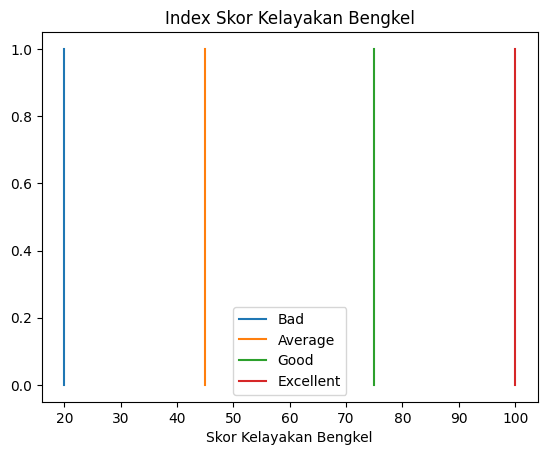

In [553]:
#Deffuzifikasi, Dibuat kembali menjadi crisp value. Nantinya akan masuk member value untuk diubah lagi menjadi nilai yang crisp agar bisa di ranking

#membuat design cangkupan z score tiap area (20, 45, 75, 100)
su1 = [[20,0],[20,1]] #bad
su2 = [[45,0],[45,1]] #average
su3 = [[75,0],[75,1]] #good
su4 = [[100,0],[100,1]] #excellent

#membangun visualisasinya
bangun_datar = [su1, su2, su3, su4]

fig,ax = plt.subplots()

for a in bangun_datar :
  xs, xy = zip(*a)
  ax.plot(xs, xy)
  ax.set_title("Index Skor Kelayakan Bengkel")
#memberi nama untuk visualisasi diagram garisnya
plt.xlabel("Skor Kelayakan Bengkel")
plt.legend(["Bad", "Average", "Good", "Excellent"])

In [554]:
#Metode Defuzifikasi
def defuzzification(tingkatInferensi): #parametenya menggunakan return nilai dari proses inferensi
    #menggunakan metode sugeno, myu value masuk untuk dihitung nilai fuzzy yang akan di defuzzifikasi
    a = tingkatInferensi['Excellent']
    b = tingkatInferensi['Good']
    c = tingkatInferensi['Average']
    d = tingkatInferensi['Bad']

    #nilai 100, 75, 45, 20 didapatkan dari memilih nilai representasi untuk ke-4 linguistik fuzzy
    hasil1 = (((a*100)+(b*75)+(c*45)+(d*20))) #dihitung a, b, c, d yang masuk merupakan input fuzzy value
    hasil2 = (a+b+c+d) #menambahkan semua nilai input fuzzy value
    result = hasil1/hasil2

    #mengembalikan nilai pembagian dari hasil1 dibagi hasil2
    return result

In [556]:
#Main Program

#membuat array dataFuzzy yang akan digunakan untuk menampilkan hasil metode seluruhnya dari fuzzy, inferensi dan defuzzifikasi
dataFuzzy = np.pad(data, ((0,0), (0,1)), mode='constant', constant_values= 0)

#looping seluruh isi myu value untuk menentukan hasil metode fuzzifikasinya
for i in range(dataFuzzy.shape[0]): #dataFuzzy.shape[0] berarti selama seluruh index masih terhitung pada dataset, program akan dijalankan
    service = fuzzyServis(dataFuzzy[i,1]) #memanggil fungsi fuzzyServis yang berguna merubah crisp value servis pada indeks ke 1 menjadi fuzzy
    price = fuzzyHarga(dataFuzzy[i,2]) #memanggil fungsi fuzzyHarga yang berguna merubah crisp value harga pada indeks ke 2 menjadi fuzzy
    inference = inferensi(service,price) #memanggil fungsi inferensi dengan parameter level servis dan tingkat harga yang sudah didapatkan dari fuzzyServis dan harga


#menampilkan isi data bengkel yang sudah melalui proses fuzzifikasi
data_frame = pd.DataFrame().from_records(dataFuzzy)

#berguna untuk memperlihatkan semua isi data bengkel tanpa batasan
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#memperlihatkan isi data bengkel
data_frame.columns = ['id', 'servis', 'harga', 'skor kelayakan bengkel']
print(data_frame)

     id  servis  harga  skor kelayakan bengkel
0     1      58      7                      71
1     2      54      1                      78
2     3      98      2                     100
3     4      52      4                      59
4     5      11      4                      20
5     6      59     10                      71
6     7      61      8                      75
7     8      30     10                      20
8     9      45      1                      45
9    10      36      9                      20
10   11      10      5                      20
11   12      38      7                      45
12   13      80      3                      83
13   14      31      8                      45
14   15      78      5                      80
15   16      82      6                      86
16   17      70      3                      75
17   18       3      9                      20
18   19      42      3                      45
19   20      49     10                      34
20   21      

In [557]:
#memperlihatkan top 10 bengkel dengan kelayakan terbaik
def terbaik(data):
  #define variabel topTen yang akan diisi dengan 10 bengkel yang kelayakannya paling baik
  topTen = []

  #looping sampai tersisa 10 bengkel terbaik (descending nilai kelayakan bengkel)
  for i in range(10):
    #menyimpan 10 bengkel terbaik dalam variabel array topTen
    topTen.append(data[np.argmax(data, axis=0)[3]])
    #Menghapus baris yang memiliki indeks yang ditemukan sebelumnya. Operasi ini menghasilkan array baru yang tidak termasuk baris dengan indeks tersebut.
    data = np.delete(data,np.argmax(data, axis=0) [3],0)

  #mengembalikan array topTen yang sudah diisi 10 bengkel terbaik
  return np.array(topTen)

#memperlihatkan 10 bengkel terbaik tersebut
top10 = terbaik(dataFuzzy)
print(top10)

[[  3  98   2 100]
 [ 34  93   4 100]
 [ 44  63   2 100]
 [ 52  94   3 100]
 [ 75  61   1 100]
 [ 91  98   3 100]
 [ 92  83   3  88]
 [ 16  82   6  86]
 [ 13  80   3  83]
 [ 60  79   6  81]]


In [558]:
#memperlihatkan 10 bengkel terbaik tersebut dengan lebih baik
data = pd.DataFrame().from_records(top10)

#diberi nama agar lebih jelas memperlihatkan setiap keterangan setiap kolomnya
data.columns = ['id', 'servis', 'harga', 'skor kelayakan bengkel']
print(data)

   id  servis  harga  skor kelayakan bengkel
0   3      98      2                     100
1  34      93      4                     100
2  44      63      2                     100
3  52      94      3                     100
4  75      61      1                     100
5  91      98      3                     100
6  92      83      3                      88
7  16      82      6                      86
8  13      80      3                      83
9  60      79      6                      81


In [559]:
#Membuat output ke dalam file xlsx
data = pd.DataFrame(top10)
writer = pd.ExcelWriter('peringkat.xlsx', engine='openpyxl')
data.to_excel(writer, sheet_name='Skor Kelayakan Bengkel')
writer.save()

<ipython-input-559-c3f9b6329d53>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
